# Akciğer Kanseri Tahmini 
Kaggle'da bulunan 'Lung Cancer' dataseti üzerinden 3 farklı model kullanarak Akciğer Kanseri Tahmini yapılacak ve sonuçlar karşılaştırılacaktır.
* Yazar: Gökay Koşar

## Dataset hakkında bilgi 
16 farklı özellik, 284 cevaptan oluşmaktadır
* Gender : M(erkek) , F(kadın)
* Age : Hastanın yaşı
* Smoking: Sigara içme durumu
* Yellow fingers: Parmak sararması
* Anxiety : Kaygı
* Peer_Pressure : Akran baskısı
* Chronic_Disease : Kronik hastalıklar
* Fatigue : Bitkinlik
* Allergy : Alerji
* Wheezing : Hırıltılı nefes
* Alcohol : Alkol kullanımı
* Coughing : Öksürme
* Shortness of Breath : Nefes darlığı
* Swallowing Difficulty : Yutkunma zorluğu
* Chest Pain : Göğüs ağrısı
* Lung Cancer : Akciğer Kanseri (Yes - No)

Not: Yapılan ankette verilen cevaplar Yes = 2, No = 1 şeklindedir

In [129]:
# Kütüphanelerin yüklenmesi
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [44]:
# Dataseti yükleyelim
df = pd.read_csv('survey_lung_cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## E.D.A (Keşifçi Veri Analizi) aşamaları

In [45]:
df.shape

(309, 16)

In [46]:
# Eksik veya boş değer var mı kontrolü
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [47]:
# Tekrarlayan veya kopya değerlerin kontrolü
df.duplicated().sum()

33

In [48]:
# Tekrarlayan değerlerin silinmesi
df = df.drop_duplicates()

In [49]:
# Veri türlerini görelim
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [50]:
# Describe fonksiyonu ile Betimsel istatistik incelemesi yapalım
# Not: 'Age' harici diğer veriler Yes:2 No:1 şeklinde olduğu için, bu verilerin sayısal verileri sadece Evet'e-Hayır'a yakınlığı olarak yorumlanabilir
df.describe().T


,count,mean,std,min,25%,50%,75%,max
AGE,276.0,62.909420,8.379355,21.0,57.75,62.5,69.0,87.0
SMOKING,276.0,1.543478,0.499011,1.0,1.00,2.0,2.0,2.0
YELLOW_FINGERS,276.0,1.576087,0.495075,1.0,1.00,2.0,2.0,2.0
ANXIETY,276.0,1.496377,0.500895,1.0,1.00,1.0,2.0,2.0
PEER_PRESSURE,276.0,1.507246,0.500856,1.0,1.00,2.0,2.0,2.0
CHRONIC DISEASE,276.0,1.521739,0.500435,1.0,1.00,2.0,2.0,2.0
FATIGUE,276.0,1.663043,0.473529,1.0,1.00,2.0,2.0,2.0
ALLERGY,276.0,1.547101,0.498681,1.0,1.00,2.0,2.0,2.0
WHEEZING,276.0,1.547101,0.498681,1.0,1.00,2.0,2.0,2.0
ALCOHOL CONSUMING,276.0,1.550725,0.498324,1.0,1.00,2.0,2.0,2.0


In [51]:
# Akciğer Kanseri ve Cinsiyet özellikleri, 'object' veri tipinde olduğu için,
# bunları sayısal değerlere çevirmemiz daha anlamlı sonuçlar elde etmemizi sağlayacak.
# Bunu yaparken, LabelEncoder kullanabiliriz. Ayrıca anlam bütünlüğü sağlayabilmek için,
# Diğer özellikleri de Yes = 1 , No = 0 olacak şekilde düzenlemeye karar verdim.
from sklearn import preprocessing
Label = preprocessing.LabelEncoder()


In [52]:
df['GENDER'] = Label.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = Label.fit_transform(df['LUNG_CANCER'])
df['SMOKING'] = Label.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS'] = Label.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY'] = Label.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE'] = Label.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE'] = Label.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE '] = Label.fit_transform(df['FATIGUE '])
df['ALLERGY '] = Label.fit_transform(df['ALLERGY '])
df['WHEEZING'] = Label.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING'] = Label.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING'] = Label.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH'] = Label.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY'] = Label.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN'] = Label.fit_transform(df['CHEST PAIN'])


In [53]:
# Datasetin şimdiki haline bakalım
# Erkek = 1, Kadın = 0 ve Yes = 1 , No = 0 olmuş olması lazım.
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int32
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    i

## Veri Görselleştirme Aşamaları

Text(0.5, 1.0, 'Cinsiyete göre Akciğer Kanseri Dağılımı')

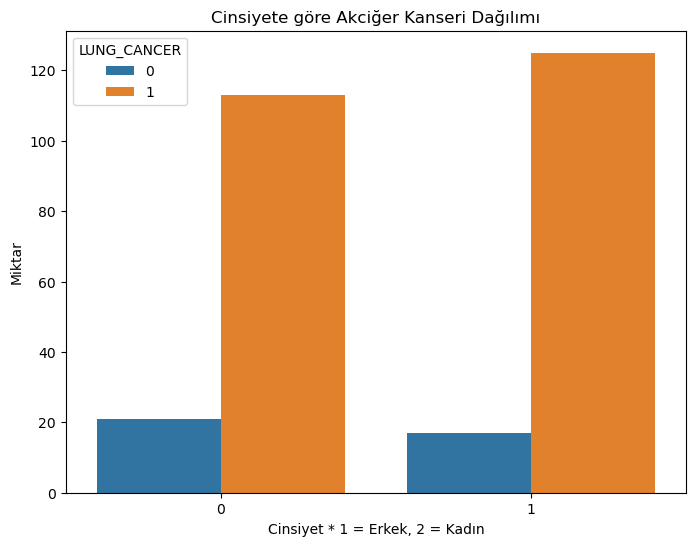

In [72]:
# Cinsiyete göre akciğer kanseri dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df)
plt.xlabel('Cinsiyet * 1 = Erkek, 2 = Kadın')
plt.ylabel('Miktar')
plt.title('Cinsiyete göre Akciğer Kanseri Dağılımı')

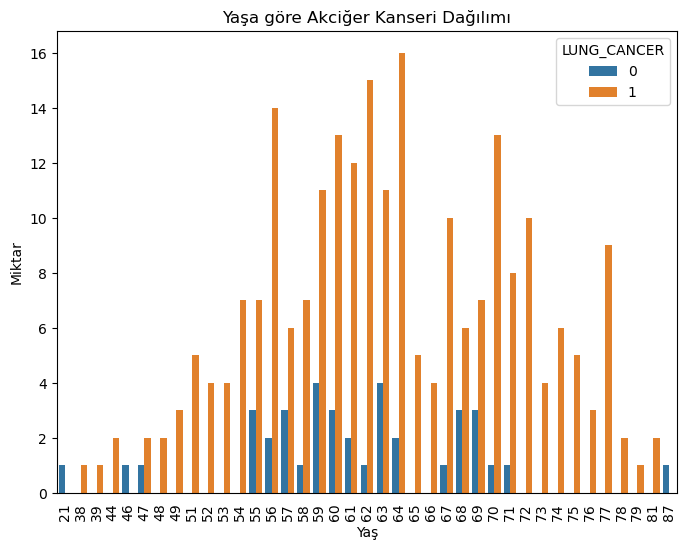

In [71]:
# Yaşa göre akciğer kanseri dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='AGE', hue='LUNG_CANCER', data=df)
plt.xlabel('Yaş')
plt.ylabel('Miktar')
plt.title('Yaşa göre Akciğer Kanseri Dağılımı')
plt.xticks(rotation=90) #X- eksenindeki değerler birbirinin üstüne bindiği için bu iki kod satırını ekledim
plt.tick_params(axis='x', which='both', bottom=False) # bu kod satırıyla output'taki uzun mesajı gizledim

Text(0.5, 1.0, 'Sigara Kullanımına göre Akciğer Kanseri Dağılımı')

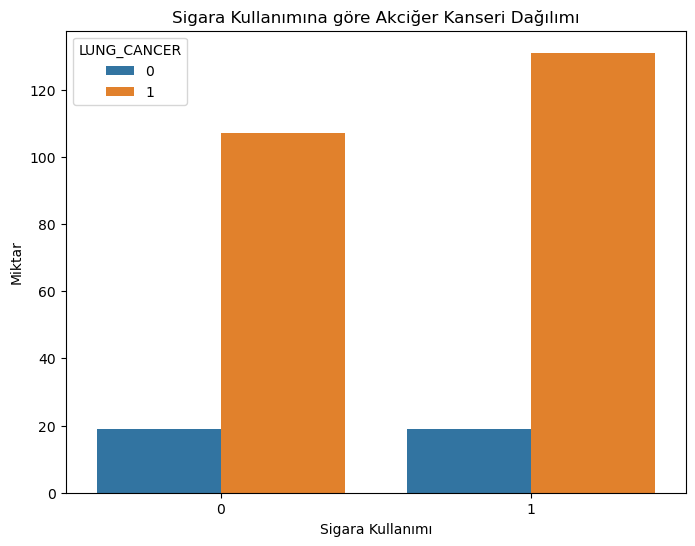

In [98]:
# Sigara kullanımına göre akciğer kanseri dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df)
plt.xlabel('Sigara Kullanımı')
plt.ylabel('Miktar')
plt.title('Sigara Kullanımına göre Akciğer Kanseri Dağılımı')

Text(0.5, 1.0, 'Parmak Sararmasına göre Akciğer Kanseri Dağılımı')

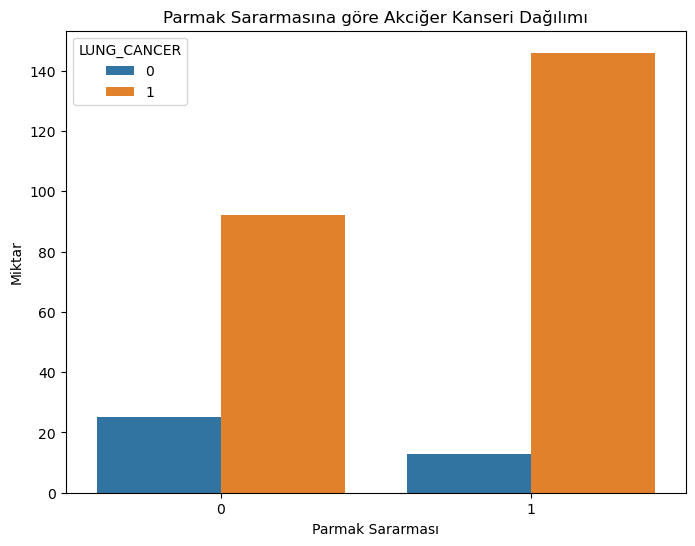

In [97]:
# Parmak Sararmasına göre akciğer kanseri dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='YELLOW_FINGERS', hue='LUNG_CANCER', data=df)
plt.xlabel('Parmak Sararması')
plt.ylabel('Miktar')
plt.title('Parmak Sararmasına göre Akciğer Kanseri Dağılımı')

Text(0.5, 1.0, 'Kaygıya göre Akciğer Kanseri Dağılımı')

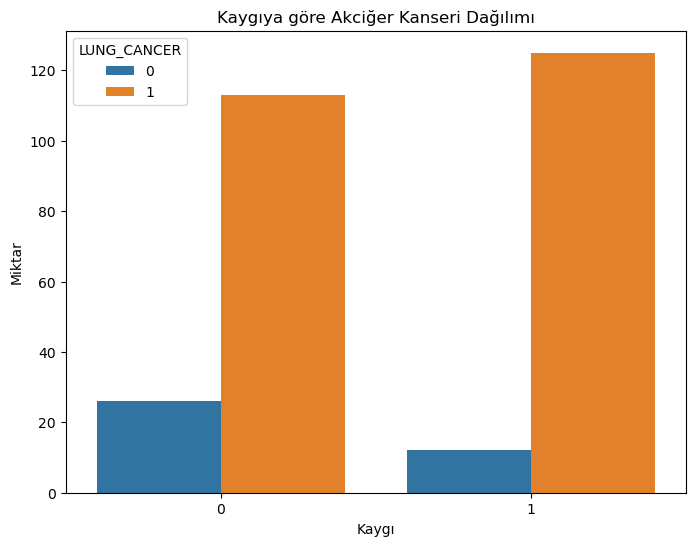

In [96]:
# Kaygıya göre akciğer kanseri dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='ANXIETY', hue='LUNG_CANCER', data=df)
plt.xlabel('Kaygı')
plt.ylabel('Miktar')
plt.title('Kaygıya göre Akciğer Kanseri Dağılımı')

Text(0.5, 1.0, 'Akran Baskısına göre Akciğer Kanseri Dağılımı')

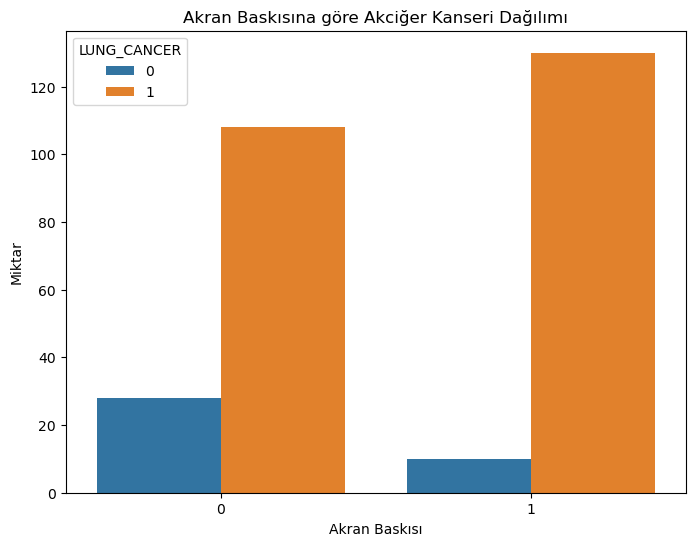

In [95]:
# Akran Baskısına göre akciğer kanseri dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='PEER_PRESSURE', hue='LUNG_CANCER', data=df)
plt.xlabel('Akran Baskısı')
plt.ylabel('Miktar')
plt.title('Akran Baskısına göre Akciğer Kanseri Dağılımı')

Text(0.5, 1.0, 'Kronik Hastalık durumuna göre Akciğer Kanseri Dağılımı')

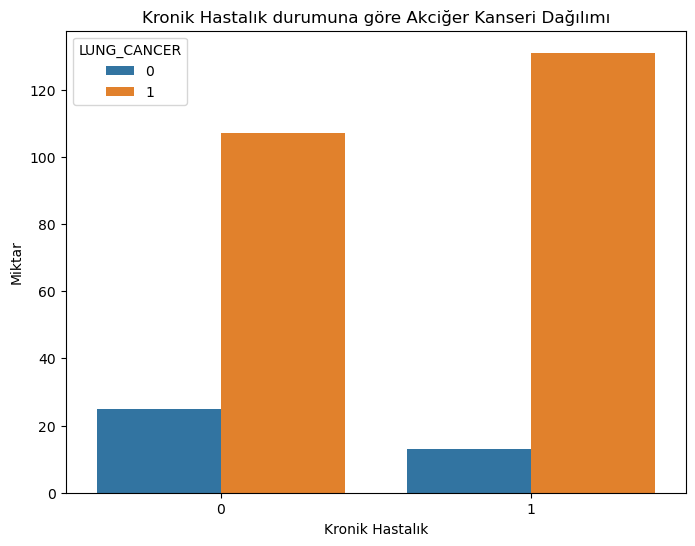

In [94]:
# Kronik Hastalık durumuna göre akciğer kanseri dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='CHRONIC DISEASE', hue='LUNG_CANCER', data=df)
plt.xlabel('Kronik Hastalık')
plt.ylabel('Miktar')
plt.title('Kronik Hastalık durumuna göre Akciğer Kanseri Dağılımı')

Text(0.5, 1.0, 'Alerji durumuna göre Akciğer Kanseri Dağılımı')

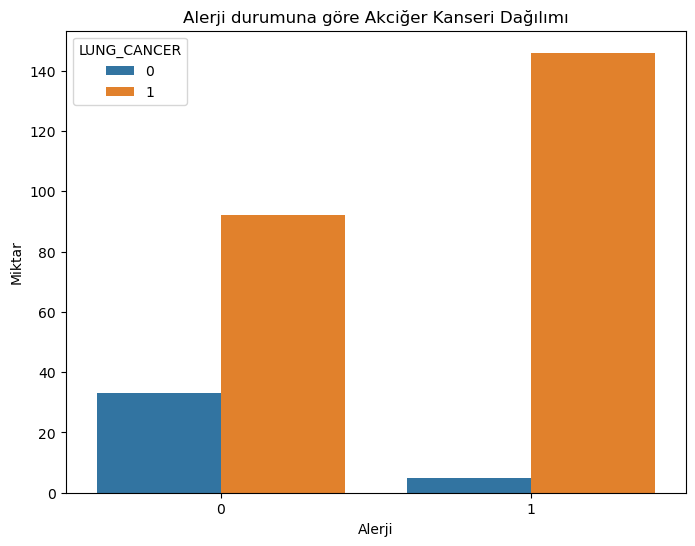

In [93]:
# Alerji durumuna göre akciğer kanseri dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='ALLERGY ', hue='LUNG_CANCER', data=df)
plt.xlabel('Alerji')
plt.ylabel('Miktar')
plt.title('Alerji durumuna göre Akciğer Kanseri Dağılımı')

Text(0.5, 1.0, 'Hırıltılı Nefes Alma durumuna göre Akciğer Kanseri Dağılımı')

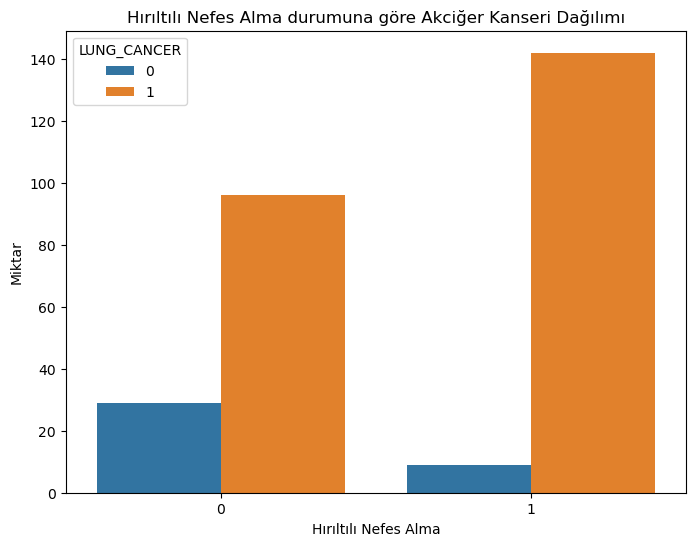

In [92]:
# Hırıltılı Nefes Alma durumuna göre akciğer kanseri dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='WHEEZING', hue='LUNG_CANCER', data=df)
plt.xlabel('Hırıltılı Nefes Alma')
plt.ylabel('Miktar')
plt.title('Hırıltılı Nefes Alma durumuna göre Akciğer Kanseri Dağılımı')

Text(0.5, 1.0, 'Alkol Kullanma durumuna göre Akciğer Kanseri Dağılımı')

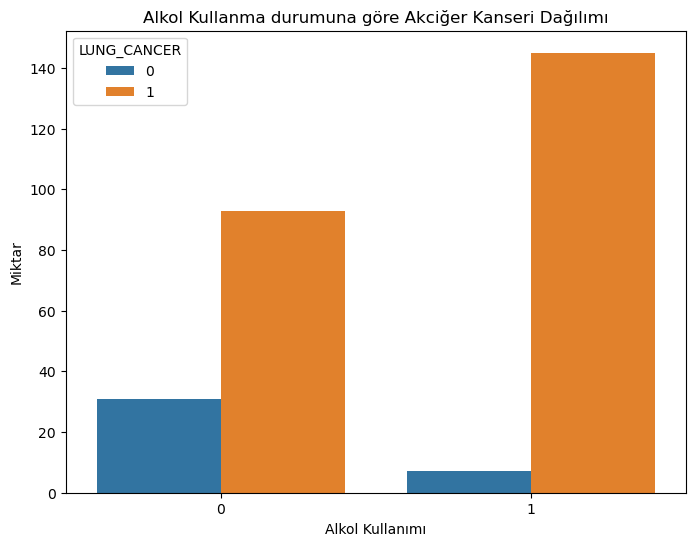

In [99]:
# Alkol Kullanma durumuna göre akciğer kanseri dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='ALCOHOL CONSUMING', hue='LUNG_CANCER', data=df)
plt.xlabel('Alkol Kullanımı')
plt.ylabel('Miktar')
plt.title('Alkol Kullanma durumuna göre Akciğer Kanseri Dağılımı')

Text(0.5, 1.0, 'Öksürme durumuna göre Akciğer Kanseri Dağılımı')

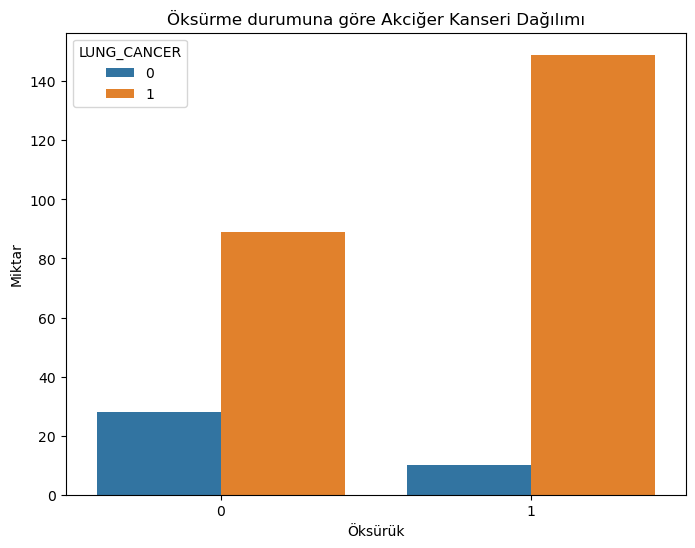

In [101]:
# Öksürme durumuna göre akciğer kanseri dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='COUGHING', hue='LUNG_CANCER', data=df)
plt.xlabel('Öksürük')
plt.ylabel('Miktar')
plt.title('Öksürme durumuna göre Akciğer Kanseri Dağılımı')

Text(0.5, 1.0, 'Nefes Darlığına göre Akciğer Kanseri Dağılımı')

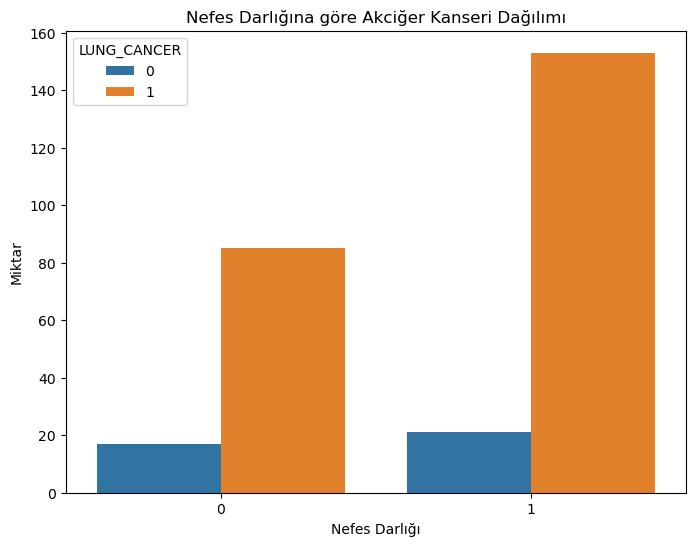

In [102]:
# Nefes Darlığına göre akciğer kanseri dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='SHORTNESS OF BREATH', hue='LUNG_CANCER', data=df)
plt.xlabel('Nefes Darlığı')
plt.ylabel('Miktar')
plt.title('Nefes Darlığına göre Akciğer Kanseri Dağılımı')

Text(0.5, 1.0, 'Yutkunma zorluğuna göre Akciğer Kanseri Dağılımı')

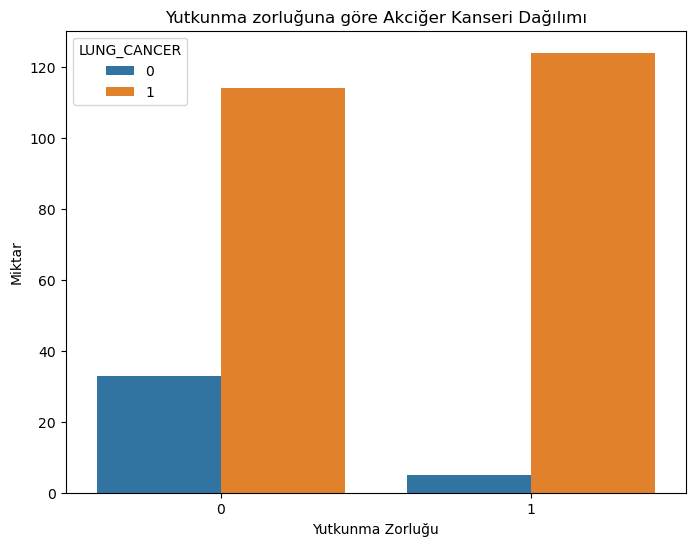

In [105]:
# Yutkunma Zorluğuna göre akciğer kanseri dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='SWALLOWING DIFFICULTY', hue='LUNG_CANCER', data=df)
plt.xlabel('Yutkunma Zorluğu')
plt.ylabel('Miktar')
plt.title('Yutkunma zorluğuna göre Akciğer Kanseri Dağılımı')

Text(0.5, 1.0, 'Göğüs Ağrısı durumuna göre Akciğer Kanseri Dağılımı')

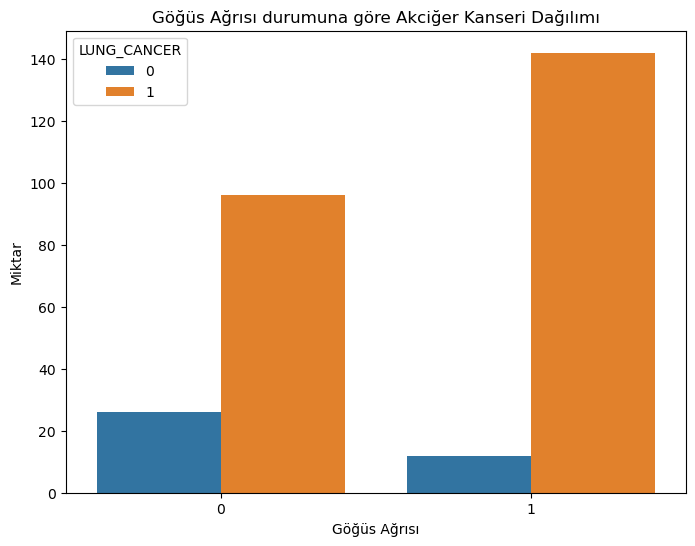

In [106]:
# Göğüs Ağrısı durumuna göre akciğer kanseri dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='CHEST PAIN', hue='LUNG_CANCER', data=df)
plt.xlabel('Göğüs Ağrısı')
plt.ylabel('Miktar')
plt.title('Göğüs Ağrısı durumuna göre Akciğer Kanseri Dağılımı')

<Axes: >

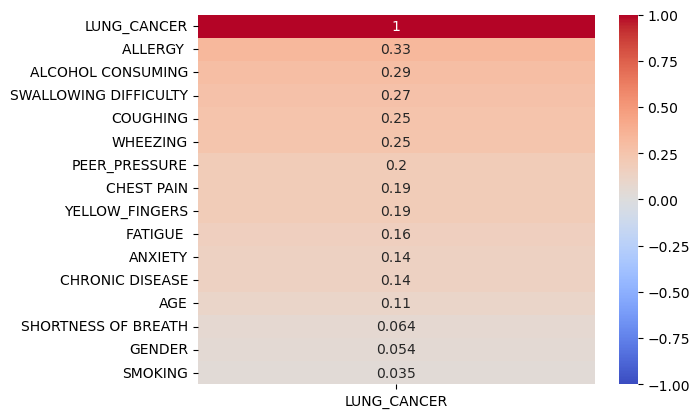

In [113]:
# Özelliklerin Akciğer Kanseri ile olan korelasyonu incelemek için heatmap kullandım
sns.heatmap(df.corr()[['LUNG_CANCER']].sort_values(by='LUNG_CANCER', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [110]:
# Veri Görselleştirme adımlarında gördüğümüz üzere; 'Smoking', 'Gender', 'Shortness of Breath' ve 'Age' değişkenlerinin korelasyonu çok düşük.
# Daha anlamlı hesaplamalar için bu değişkenleri datasetimden çıkardım.
df_1 = df.drop(columns=['SMOKING','GENDER', 'SHORTNESS OF BREATH','AGE'])

In [111]:
df_1.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0


<Axes: >

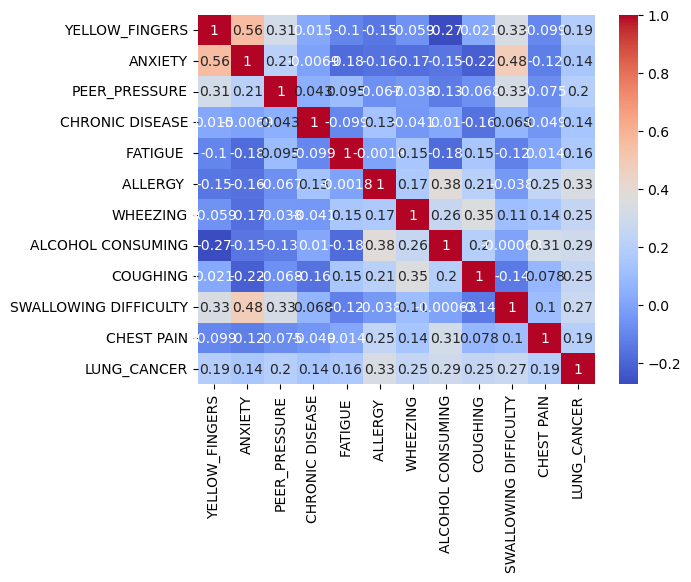

In [115]:
sns.heatmap(df_1.corr(), cmap='coolwarm', annot=True)

In [116]:
# Yeni oluşturduğumuz datasette, ANXIETY ve YELLOW FINGERS özelliklerinin korelasyonunun yüksek(>0.5) olduğunu görüyoruz.
# Bu yüzden bu iki değişkeni kullanıp yeni bir değişken oluşturmayı uygun gördüm. (Bu işleme bir projede rastlamıştım)
df_1['ANX_FINGERS'] = df_1['ANXIETY'] * df_1['YELLOW_FINGERS']
df_1.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANX_FINGERS
0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1,0
2,0,0,1,0,1,0,1,0,1,0,1,0,0
3,1,1,0,0,0,0,0,1,0,1,1,0,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0


## Modelleme 

In [118]:
# Bağımlı- Bağımsız değişken ayrımı
X = df_1.drop('LUNG_CANCER',axis=1)
y = df_1['LUNG_CANCER']

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

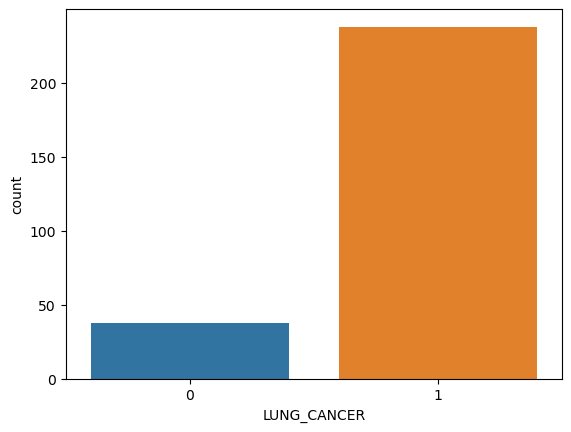

In [117]:
sns.countplot(x='LUNG_CANCER',data=df)

In [119]:
# Veri Setini incelediğimde, Akciğer kanseri olanlar ve olmayanlar arasında büyük bir fark olduğunu gözlemlemiştim.
# Bu farkın modellemede negatif bir etkisi olacağını düşündüm.
# Yaptığım araştırmalar sonucunda 'Adaptative Synthetic' metodunu kullanmaya karar verdim.
# çünkü burada net bir şekilde düşük ölçümlü bir sınıf var, bunu da SMOTE tekniklerinden birini kullanarak çözebiliriz.
from imblearn.over_sampling import ADASYN
ADA = ADASYN(random_state=99,n_neighbors=5)
X, y = ADA.fit_resample(X, y)

In [122]:
# Bizden 3 adet model belirlememiz istendi.
# Logistic Regression, SVC, Random Forest modellerini belirledim.


In [124]:
# Test ve train olarak datayı bölelim
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 99)

In [125]:
### LOGISTIC REGRESSION ###
from sklearn.linear_model import LogisticRegression
LogModel = LogisticRegression(random_state = 99)
LogModel.fit(X_train,y_train)

LogisticRegression(random_state=99)

In [126]:
# Modelimizi kurduk, şimdi test olarak ayırdığımız data ile tahmin yapalım
y_LogModel_pred = LogModel.predict(X_test)
y_LogModel_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [128]:
# Performans Metrikleri
from sklearn.metrics import classification_report, accuracy_score, f1_score
LogModel_CR = classification_report(y_test,y_LogModel_pred)
print(LogModel_CR)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        74
           1       0.96      0.96      0.96        68

    accuracy                           0.96       142
   macro avg       0.96      0.96      0.96       142
weighted avg       0.96      0.96      0.96       142



In [ ]:
# Logistic Regression kullanarak oluşturduğumuz modelin accuracy'si %96.

In [131]:
### SUPPORT VECTOR CLASSIFIER (SVC) ###
from sklearn.svm import SVC
SVCmodel = SVC(random_state=99)
SVCmodel.fit(X_train,y_train)

SVC(random_state=99)

In [132]:
y_SVC_pred = SVCmodel.predict(X_test)
y_SVC_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [133]:
# Performans Metrikleri
SVC_CR = classification_report(y_test,y_SVC_pred)
print(SVC_CR)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       0.98      0.96      0.97        68

    accuracy                           0.97       142
   macro avg       0.97      0.97      0.97       142
weighted avg       0.97      0.97      0.97       142



In [ ]:
# Support Vector Classifier modelimizin accuracy'si %97.

In [136]:
### RANDOM FOREST ###
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(random_state=99)
RFmodel.fit(X_train,y_train)

RandomForestClassifier(random_state=99)

In [137]:
y_RF_pred = RFmodel.predict(X_test)
y_RF_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [138]:
# Performans Metrikleri
RF_CR = classification_report(y_test,y_RF_pred)
print(RF_CR)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        74
           1       0.94      0.97      0.96        68

    accuracy                           0.96       142
   macro avg       0.96      0.96      0.96       142
weighted avg       0.96      0.96      0.96       142



In [139]:
# Random Forest modelimizin de accuracy'si %96 geldi. 
# Fakat bunlar tek training ve test set üzerinden elde edilen sonuçlar ve büyük ihtimalle 'overfitting' ile karşılaştık.
# Daha sağlıklı ve anlamlı sonuçlar elde etmek için ' K-fold Cross Validation ' kullanmayı düşündüm.
# Böylelikle tek bir training-test seti yerine tüm veriyi kullanmış ve overfitting sorununu çözmüş olacağım.

In [155]:
# K-Fold Cross Validation için gerekli importlar
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [152]:
k = 15 # nispeten küçük bir veri setine sahip olduğum için k miktarını yüksek tutmayı tercih ettim.
kf =KFold(n_splits=k, shuffle=True,random_state=99)

In [156]:
# Şimdi modellerimizin CV skorlarına bakalım
# cross_validate içindeki scoring parametresi için değerleri bir liste yazalım

scoring_params = ['accuracy','precision','recall','f1']

# Logistic Regression
LogModel_K = cross_validate(LogModel,X,y, cv = kf, scoring=scoring_params)

# SVC
SVCmodel_K = cross_validate(SVCmodel,X,y, cv = k, scoring=scoring_params)

# Random Forest
RFmodel_K = cross_validate(RFmodel,X,y, cv = kf, scoring=scoring_params)


In [164]:
# Sonuçları yazdırmak için bir for döngüsü yazalım
for g in scoring_params:
    skorlar = LogModel_K[f'test_{g}']
    ortalama_skor = np.mean(skorlar)
    print(f"{g.capitalize()} Skorları: {skorlar}")
    print(f"Ortalama {g.capitalize()} Skoru: {ortalama_skor}")

for g in scoring_params:
    skorlar = SVCmodel_K[f'test_{g}']
    ortalama_skor = np.mean(skorlar)
    print(f"{g.capitalize()} Skorları: {skorlar}")
    print(f"Ortalama {g.capitalize()} Skoru: {ortalama_skor}")

for g in scoring_params:
    skorlar = RFmodel_K[f'test_{g}']
    ortalama_skor = np.mean(skorlar)
    print(f"{g.capitalize()} Skorları: {skorlar}")
    print(f"Ortalama {g.capitalize()} Skoru: {ortalama_skor}")


Accuracy Skorları: [1.         0.90625    0.9375     0.9375     0.96875    0.96875
 0.83870968 0.93548387 0.93548387 0.96774194 0.93548387 0.87096774
 0.87096774 0.93548387 0.90322581]
Ortalama Accuracy Skoru: 0.9274865591397848
Precision Skorları: [1.         0.93333333 0.94117647 0.9375     1.         0.94444444
 0.92307692 0.86666667 1.         0.9375     1.         0.85714286
 0.9        0.94444444 0.94736842]
Ortalama Precision Skoru: 0.9421769040499691
Recall Skorları: [1.         0.875      0.94117647 0.9375     0.92857143 1.
 0.75       1.         0.84615385 1.         0.90909091 0.66666667
 0.9        0.94444444 0.9       ]
Ortalama Recall Skoru: 0.9065735843677021
F1 Skorları: [1.         0.90322581 0.94117647 0.9375     0.96296296 0.97142857
 0.82758621 0.92857143 0.91666667 0.96774194 0.95238095 0.75
 0.9        0.94444444 0.92307692]
Ortalama F1 Skoru: 0.921784157930148
Accuracy Skorları: [0.875      0.90625    0.96875    0.875      1.         0.875
 0.93548387 0.96774194 

## Modellerin Kıyaslanması

* Logistic Regression için metriklerimiz = Accuracy 0.92, Precision 0.94, Recall 0.90, f-1 0.92
* SVC için metriklerimiz = Accuracy 0.93, Precision 0.95, Recall 0.92, f-1 0.93
* RF için metriklerimiz = Accuracy 0.95, Precision 0.98, Recall 0.92, f-1 0.94

In [165]:
# Bu metrikleri kıyaslamak için bir dataframe oluşturalım
modeller = ['LogisticReg', 'SVC','RF']
accuracy_skorlar = [0.92,0.93,0.95]
precision_skorlar = [0.94,0.95,0.98]
recall_skorlar = [0.90,0.92,0.92]
f1_skorlar = [0.92,0.93,0.94]

performans_data = {
    'Model' : modeller,
    'Accuracy' : accuracy_skorlar,
    'Precision' : precision_skorlar,
    'Recall' : recall_skorlar,
    'F-1' : f1_skorlar
}

performans_df = pd.DataFrame(performans_data)
print(performans_df)

         Model  Accuracy  Precision  Recall   F-1
0  LogisticReg      0.92       0.94    0.90  0.92
1          SVC      0.93       0.95    0.92  0.93
2           RF      0.95       0.98    0.92  0.94


Text(0.5, 1.0, '3 Modelin Performans Metriklerinin kıyaslanması')

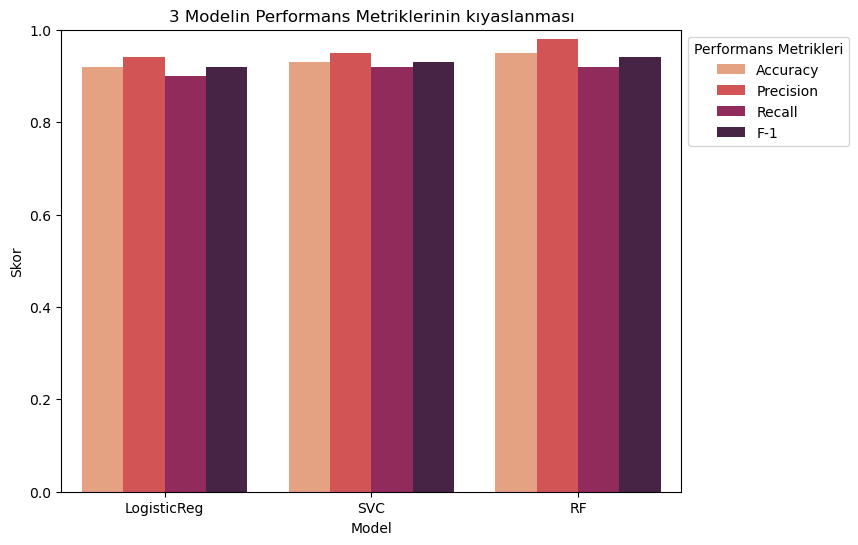

In [179]:
# Görselleştirme ile kıyas
# Burada pd.melt kullanarak dataframe formatını değiştirdim böylelikle görselleştirmeye uygun oldu.
g_performans_df = pd.melt(performans_df, id_vars=['Model'],value_vars=['Accuracy','Precision','Recall','F-1'],
                          var_name='Performans Metrikleri',value_name='Skor')

plt.figure(figsize=(8,6))
sns.barplot(x='Model',y='Skor',hue='Performans Metrikleri',data=g_performans_df, palette='rocket_r')
plt.ylim(0,1) # 0-1 arası olduğu için 
plt.legend(title = 'Performans Metrikleri', bbox_to_anchor = (1,1), loc='best') # legendin konumu ve boyutunu ayarlama
plt.title('3 Modelin Performans Metriklerinin kıyaslanması')

